In [0]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Попробуем решить ML часть задачи разработки anti-fraud системы

In [3]:
GeneralDataFrame = pd.read_csv('./creditcard.csv')
GeneralDataFrame.shape

(284807, 31)

In [0]:
GeneralDataFrame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
GeneralDataFrame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


В нашем распоряжении есть набор данных, в котором около 300к записей транзакций по банковским картам. Судя по тому, что мы видим первым взглядом, можно говорить о том что наши данные уже стандартизированы, все поля кроме Amount. Имеем 2 метки классов 0 - NotFraud, 1 - Fraud, целевой класс, который будем пытаться предсказывать - Fraud.
Заметим еще то, что данные у нас анонимные, это связано со спецификой решаемой задачи, финансовые данные как и медицинские должны быть защещены путем анонимизации, если вы конечно не чей-то личный врач или банкир.

Как говорилось ранее в лекции, особенность задачи anti-fraud заключается в том, что скорее всего мы будем работать с несбалансированными по классам выборками. Чаще всего хороших транзакций гораздо больше чем мошеннических, потому что каждый участник процесса формирования и обработки транзакций на своей стороне пытается снизить количество фродовых транзакций, да и в принципе мошенников меньше чем нормальных людей, поэтому работаем с тем что есть.

Посмотрим, можем нам повезло и у нас классы сбалансированы:

In [4]:
Names = {0:'Not_Fraud',1:'Fraud'}
print(GeneralDataFrame.Class.value_counts().rename(index = Names))

Not_Fraud    284315
Fraud           492
Name: Class, dtype: int64


Увы, конечно же они не будут сбалансированы, ничего удивительного, причем в нашем случае расхождение в количестве ппримеров каждого класса очень сильное, в несколько порядков.

Разделим наш набор данных на предикторы и целевую перменную, которую будем пытаться предсказывать. Избавимся от столбца Time, в данном случае мы не пытаемся решить задачу прогнозирования временных рядов, поэтому информации для нас в этой переменной не так уж и много.

In [5]:
FeatureNames = GeneralDataFrame.iloc[:,1:30].columns
Target = GeneralDataFrame.iloc[:1,30:].columns
print(FeatureNames)
print(Target)

DataFeatures = GeneralDataFrame[FeatureNames]
DataTarget = GeneralDataFrame[Target]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


Мы изначально заметили дисбаланс классов, уже сходу понимаем что строить классификатор на таких данных это не очень хорошая идея, потому что мы скорее всего получим ситуацию переобучения модели под конкретный класс (под тот класс примеров которого больше). Но все же чисто в исследовательских целях обучим какой-нибудь простой алгоритм типа логистической регрессии, просто для понимания того, о чего будем отталкиваться в плане точности классификации.

In [0]:
#разбиваем генеральную выборку на тренировочную - 70% и тестовую - 30%
Splitter = StratifiedShuffleSplit(n_splits = 1,test_size = 0.3,random_state = 40)
for train_indices,test_indices in Splitter.split(DataFeatures,DataTarget):
    XTrain,YTrain = DataFeatures.iloc[train_indices],DataTarget.iloc[train_indices]
    XTest,YTest = DataFeatures.iloc[test_indices],DataTarget.iloc[test_indices]

print('x_test:' + str(len(XTrain)) + '  y_test:' + str(len(YTrain)))
print('x_train:' + str(len(XTest)) + '  y_train:' + str(len(YTest)))

x_test:199364  y_test:199364
x_train:85443  y_train:85443


In [0]:
#проверим что там у нас с балансами классов
def CheckClassesBalance(Data):
    Fraud_Train = []
    NotFraud_Train = []
    
    for i in Data:
        if i == 1:
            Fraud_Train.append(i)
        else:
            NotFraud_Train.append(i)
        
    print('Number of training elements fraud class: ' + str(len(Fraud_Train)))
    print('Number of training elements not fraud class: ' + str(len(NotFraud_Train)))

Y = YTrain['Class']
CheckClassesBalance(Y)

Y = YTest['Class']
CheckClassesBalance(Y)

Number of training elements fraud class: 344
Number of training elements not fraud class: 199020
Number of training elements fraud class: 148
Number of training elements not fraud class: 85295


In [32]:
#либо еще такой вариант есть, кому как нравится, результат разбиения на выборки будет одинаковый
XTrain,XTest,YTrain,YTest = train_test_split(DataFeatures,DataTarget,#stratify = DataTarget,
                                             test_size = 0.3,
                                             random_state = 40)

print('x_test:' + str(len(XTrain)) + '  y_test:' + str(len(YTrain)))
print('x_train:' + str(len(XTest)) + '  y_train:' + str(len(YTest)))

x_test:199364  y_test:199364
x_train:85443  y_train:85443


In [0]:
Y = YTrain['Class']
CheckClassesBalance(Y)

Y = YTest['Class']
CheckClassesBalance(Y)

Number of training elements fraud class: 344
Number of training elements not fraud class: 199020
Number of training elements fraud class: 148
Number of training elements not fraud class: 85295


In [0]:
pd.unique(YTrain['Class'])

array([0, 1], dtype=int64)

In [33]:
#Формируем веса для переменных
from sklearn.utils import compute_class_weight
w = compute_class_weight('balanced', np.unique(YTrain), YTrain['Class'])
weights = {
     np.unique(YTrain)[0] : w[0], # class 0 with weight 0
     np.unique(YTrain)[1] : w[1]  # class 1 with weight 1 
}
print(weights) #веса

{0: 0.5008894025425858, 1: 281.5875706214689}


![%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202019-07-26%20%D0%B2%2011.32.59.png](attachment:%D0%A1%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA%20%D1%8D%D0%BA%D1%80%D0%B0%D0%BD%D0%B0%202019-07-26%20%D0%B2%2011.32.59.png)

# Обучение классификатора на ансамблевом алгоритме случайного леса деревьев решений

Как и в случае использования алгоритма логистической регрессии для разработки бинарного классификатора карточных транзакций, попробуем обучиться на несбалансированных данных с помощью алгоритма случайного леса на минималках. 

In [9]:
#провалидируем классификатор с помощью кросс-валидации на 5 фолдах с расчетом среднего значения точности
SKF = StratifiedKFold(n_splits = 5,shuffle = True,random_state = 40)
RFC = RandomForestClassifier()
Results = cross_val_score(RFC,XTrain,YTrain,cv = SKF)
print("CV accuracy score: {:.2f}%".format(Results.mean()*100))

CV accuracy score: 99.94%


In [36]:
#обучаем на полной тренировочной выборке
Model_RFC_RandSeed = np.random.RandomState(40)

Model_RFC = RandomForestClassifier(random_state = Model_RFC_RandSeed, class_weight=weights, 
                                   n_estimators=50, max_depth=50, min_samples_leaf=2)
Model_RFC.fit(XTrain,YTrain)

RandomForestClassifier(bootstrap=True,
                       class_weight={0: 0.5008894025425858,
                                     1: 281.5875706214689},
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=<mtrand.RandomState object at 0x7fb49294e0d8>,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0    0.99967   0.99994   0.99981     85305
           1    0.95652   0.79710   0.86957       138

    accuracy                        0.99961     85443
   macro avg    0.97810   0.89852   0.93469     85443
weighted avg    0.99960   0.99961   0.99960     85443



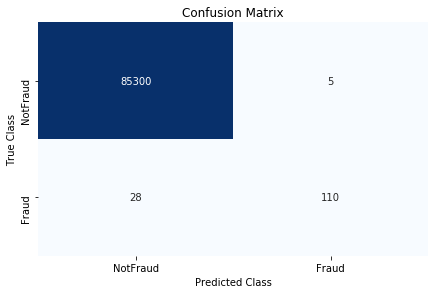

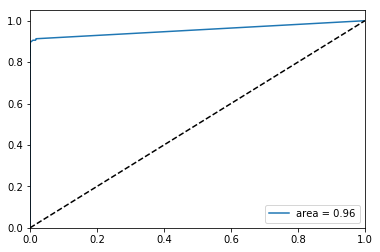

In [45]:
#проверим работоспособность нашего классификатора на тестовой выборке
Pred = Model_RFC.predict(XTest)
print(classification_report(YTest,Pred,digits=5))

ClassNames = ['NotFraud','Fraud']
Matrix = confusion_matrix(YTest,Pred)
DFCM = pd.DataFrame(Matrix,index = ClassNames, columns = ClassNames)
sns.heatmap(DFCM,annot = True,cbar = None,cmap = "Blues",fmt = 'g')
plt.title("Confusion Matrix"),plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

PredProbaClass = Model_RFC.predict_proba(XTest)[:,1]
fpr,tpr,_ = roc_curve(YTest,PredProbaClass)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'area = %.2f' %roc_auc)
plt.plot([0, 1],[0, 1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc = 'lower right')
plt.show()

В логистической регрессии (и её обобщениях – нейросетях) баланс классов сильно влияет на свободный член, но очень слабо – на коэффициенты наклона. Действительно, предсказанное отношение шансов  из бинарной логистической регрессии меняется на константу при изменении баланса классов, и этот эффект уходит в свободный член.


В деревьях решений (и их обобщениях – случайном лесе и градиентном бустинге), дисбаланс классов влияет на меры неоднородности (impurity) листьев, но это влияние примерно пропорционально для всех кандидатов в очередную разбивку (split), и потому обычно не особо влияет на выбор разбивок.


С другой стороны, на не-вероятностные модели типа SVM дисбаланс классов может серьёзно влиять. SVM строит обучающую гиперплоскость так, что примерно одно и то же число положительных и отрицательных примеров находится на разделяющей полосе или на неправильной её стороне. Поэтому изменение баланса классов может повлиять это число, а значит, и на положение границы.


Когда мы используем вероятностные модели для бинарной классификации, всё ОК: во время обучения, модели не сильно зависят от баланса классов, а при тестировании мы можем использовать метрики, нечувствительные к балансу классов. Такие метрики (например, ROC AUC) зависят от предсказанных вероятностей классов, а не от «жёсткой» дискретной классификации.

Источник: https://habr.com/ru/post/349078/

To-do:
Мы разработали классификатор, основанный на алгоритме случайнго леса решающих деревьев, хоть он и не так чувствителен к дисбалансу классов как логистическая регрессия или нейронная сеть (по причинам описанным выше), точность его работы можно попробовать увеличить. Мы использовали случайный лес на минималках, можно попробовать поиграться с гипер-параметрами алгоритма для улучшения его работы.
Увеличение значений гипер параметров (количество деревьев,глубина... в документации sklearn можно посмотреть полный перечень https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) ведет к усложнению архитектуры модели, что в свою очередь может привести к переобучению, для этого было бы неплохо провести процесс регуляризации и подбора оптимальных гипер-параметров, данный процесс хорошо и наглядно описан в одном из занятий курса ODS https://habr.com/ru/company/ods/blog/324402/.

In [65]:
from sklearn.ensemble import IsolationForest
#обучаем модель изолированного леса на полной тренировочной выборке
Model_IForest_RandSeed = np.random.RandomState(40)

Model_IForest = IsolationForest(random_state = Model_IForest_RandSeed,
                                   n_estimators=10, bootstrap=True, behaviour='new')
Model_IForest.fit(XTrain,YTrain)

IsolationForest(behaviour='new', bootstrap=True, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=10,
                n_jobs=None,
                random_state=<mtrand.RandomState object at 0x7fb4925d3e10>,
                verbose=0, warm_start=False)

In [66]:
#проверим работоспособность нашего классификатора на тестовой выборке
Pred = Model_IForest.predict(XTest)
print(classification_report(YTest,Pred,digits=5))


              precision    recall  f1-score   support

          -1    0.00000   0.00000   0.00000         0
           0    0.00000   0.00000   0.00000     85305
           1    0.00043   0.23913   0.00086       138

    accuracy                        0.00039     85443
   macro avg    0.00014   0.07971   0.00029     85443
weighted avg    0.00000   0.00039   0.00000     85443

